<a href="https://colab.research.google.com/github/Jin0331/TA/blob/master/DS_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *9주차 실습*

https://brunch.co.kr/@cheonmyung/3

- - -


## **1. 데이터 시각화 - base R plot, Tidyverse ggplot2(1)**

- - -

In [ ]:
install.packages("data.table")
library(tidyverse)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### **(1) 산점도(Scatter plot), 공분산(Covariance), 상관계수(Correlation Coefficient)**

- - -

#### **A. 산점도(Scatter plot)**

산점도는 두 개 변수 간의 관계를 나타내는 방법. 상관계수를 파악하지 전에 두 변수 간 관련성을 시각적으로 파악할 수 있음.

![대체 텍스트](https://steemitimages.com/p/C3TZR1g81UNaPs7vzNXHueW5ZM76DSHWEY7onmfLxcK2iQX7ak457pSFhx3gRtBrMmLGuTSTbrY5pmkD2zy3wC7yb1PYFJ8uDFmxQGPSsykFrr1zQjNY3VY?format=match&mode=fit&width=640)



In [ ]:
DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Regular_Season_Batter.csv") %>% as_tibble()

In [ ]:
DF %>% show()

# A tibble: 2,454 x 29
   batter_id batter_name  year team    avg     G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <dbl> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.339    50   183    27    62     9     0
 2         1 강경학       2011 한화  0         2     1     0     0     0     0
 3         1 강경학       2014 한화  0.221    41    86    11    19     2     3
 4         1 강경학       2015 한화  0.257   120   311    50    80     7     4
 5         1 강경학       2016 한화  0.158    46   101    16    16     3     2
 6         1 강경학       2017 한화  0.214    59    84    17    18     2     1
 7         1 강경학       2018 한화  0.278    77   245    42    68    11     1
 8         2 강구성       2013 NC    0         2     2     0     0     0     0
 9         2 강구성       2015 NC    0.2       4     5     0     1     1     0
10         2 강구성       2016 NC    0         2     3     0     0     0     0
# … with 2,444 more rows, and 18 more variables: HR <int>, TB <int>, RBI

In [ ]:
DF %>% str()

tibble [2,454 × 29] (S3: tbl_df/tbl/data.frame)
 $ batter_id      : int [1:2454] 0 1 1 1 1 1 1 2 2 2 ...
 $ batter_name    : chr [1:2454] "가르시아" "강경학" "강경학" "강경학" ...
 $ year           : int [1:2454] 2018 2011 2014 2015 2016 2017 2018 2013 2015 2016 ...
 $ team           : chr [1:2454] "LG" "한화" "한화" "한화" ...
 $ avg            : num [1:2454] 0.339 0 0.221 0.257 0.158 0.214 0.278 0 0.2 0 ...
 $ G              : int [1:2454] 50 2 41 120 46 59 77 2 4 2 ...
 $ AB             : int [1:2454] 183 1 86 311 101 84 245 2 5 3 ...
 $ R              : int [1:2454] 27 0 11 50 16 17 42 0 0 0 ...
 $ H              : int [1:2454] 62 0 19 80 16 18 68 0 1 0 ...
 $ 2B             : int [1:2454] 9 0 2 7 3 2 11 0 1 0 ...
 $ 3B             : int [1:2454] 0 0 3 4 2 1 1 0 0 0 ...
 $ HR             : int [1:2454] 8 0 1 2 1 0 5 0 0 0 ...
 $ TB             : int [1:2454] 95 0 30 101 26 22 96 0 2 0 ...
 $ RBI            : int [1:2454] 34 0 7 27 7 4 27 0 0 0 ...
 $ SB             : int [1:2454] 5 0 0 4 0 1 6 0 0 0 

* plot() - base R

기본적으로 plot() 함수는 주어진 데이터를 시각화하는데 모두 사용할 수 있는 일반적인 함수(base R)

```
plot(x, y) or plot(y ~ x)

x ==> x 축
y ==> y 축                                                    

```

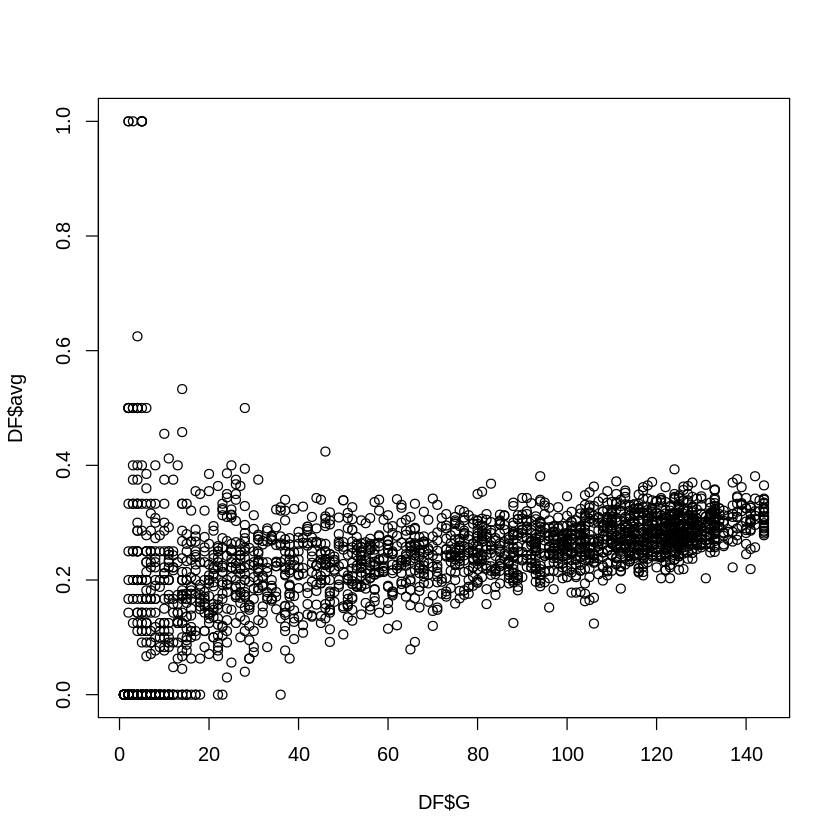

In [ ]:
# https://dacon.io/competitions/official/235546/data/
# G(출전게임수), avg(타율), R(득점), SO(삼진아웃)

plot(x = DF$G, y = DF$avg)

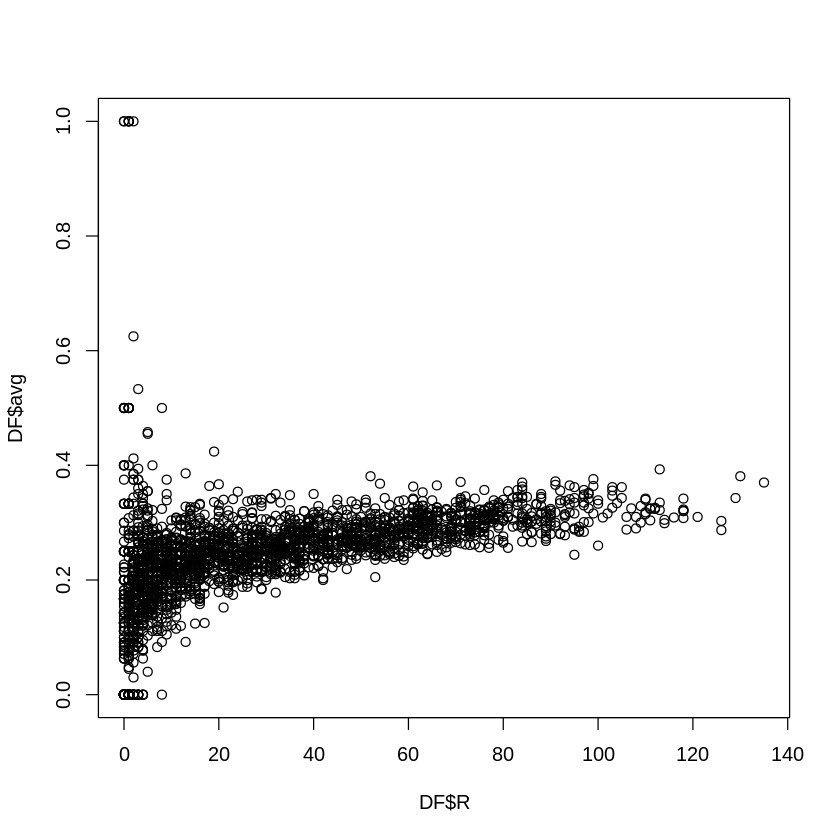

In [ ]:
# R(득점)
plot(DF$avg ~ DF$R ) 

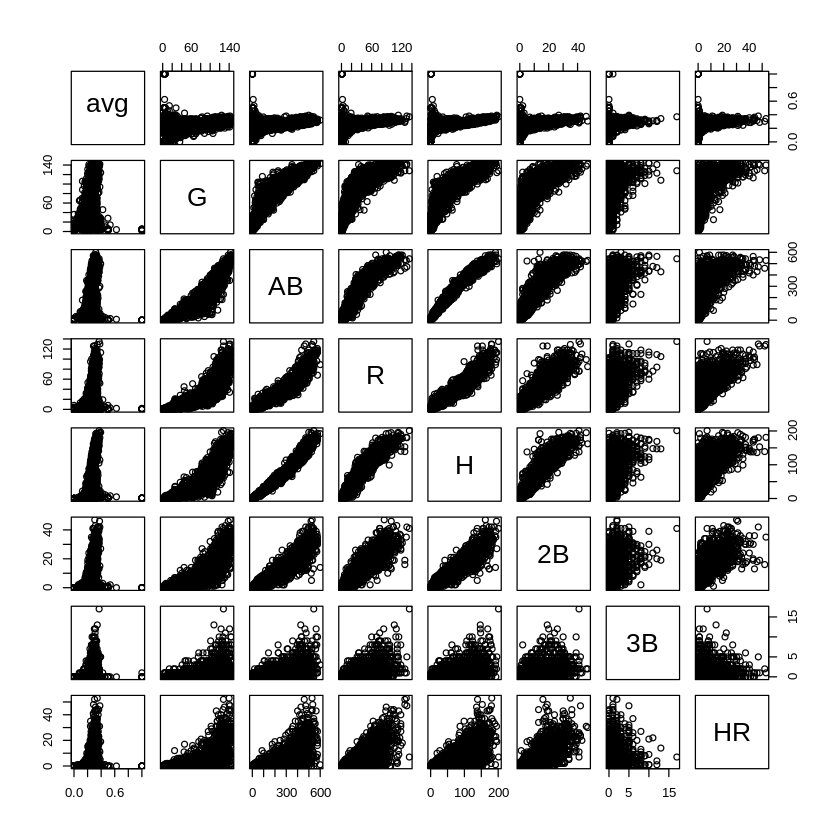

In [ ]:
# AB(타수), H(안타)
DF[, 5:12] %>% plot()

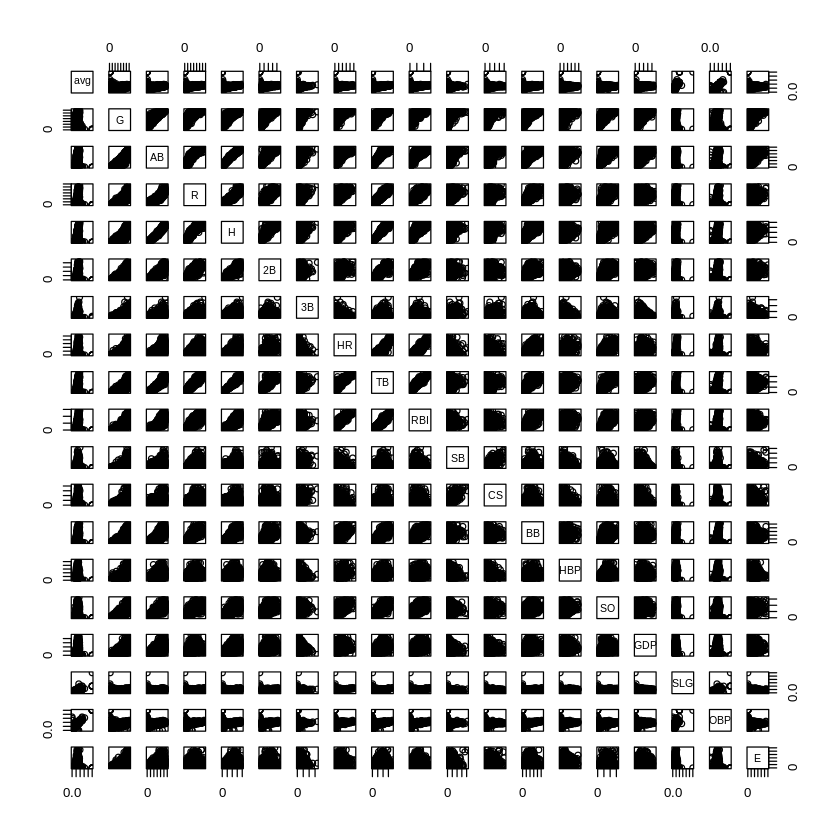

In [ ]:
# 숫자형 열 전체..
DF[, 5:23] %>% plot()

#### **B. 공분산(Covariance), 상관계수(Correlation Coefficient)**

- - -

산점도를 이용하면 두 변수간의 직선적인 관계를 개략적으로 파악할 수 있지만, 두 변수 사이의 관계를 보다 정확히 숫자로 나타낼 수 없다.

``공분산과 상관계수``를 활용하여 관계를 수치로 파악한다.

* **공분산**(``cov()`` 사용)

공분산은 2개의 확률변수의 상관정도를 나타내는 값인데, 만약 2개의 변수 중 ``하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하면 공분산의 값은 양수, 반대의 경우에는 음수``가 나온다.



In [ ]:
# cov()
cov(DF$G, DF$avg)

[1] NA

In [ ]:
# 결측값 처리, na.omit을 이용해 행 전체를 날릴 것인가... 아니면 NA를 0으로 바꿀 것인가!! 선택의 자유~

DF_NA <- DF %>% replace(is.na(.), 0) # tidyr replace 이용

In [ ]:
cov(DF_NA$G, DF_NA$avg) # G(경기수), avg(타율)

[1] 2.295412

In [ ]:
cov(DF_NA$avg, DF_NA$HR) # avg(타율), HR(홈런)

[1] 0.3025775

In [ ]:
cov(DF_NA$G, DF_NA$AB) # G(경기수), AB(타수)

[1] 7122.257

In [ ]:
DF_NA[, 5:12] %>% cov()

,avg,G,AB,R,H,2B,3B,HR
avg,0.01017958,2.295412,8.630207,1.44330,2.791114,0.491188,0.04560962,0.3025775
G,2.29541229,2033.457190,7122.256518,1115.50266,2103.314519,371.111798,36.26198315,227.7151038
AB,8.63020729,7122.256518,28742.804310,4616.44544,8729.386435,1546.967556,149.05524895,986.2561571
R,1.44329968,1115.502664,4616.445436,828.21694,1445.567656,257.777680,27.11165444,176.8639935
H,2.79111424,2103.314519,8729.386435,1445.56766,2730.464190,484.529980,46.08551610,313.6757514
2B,0.49118801,371.111798,1546.967556,257.77768,484.529980,97.442833,7.61019273,58.8845761
3B,0.04560962,36.261983,149.055249,27.11165,46.085516,7.610193,2.71324603,2.6985013
HR,0.30257749,227.715104,986.256157,176.86399,313.675751,58.884576,2.69850134,63.8301913


* **상관계수**(``cor()`` 사용)

공분산은 상관관계의 상승 혹은 하강하는 경향을 이해할 수 있으나, 2개 변수의 측정 단위의 따라 값이 달라지므로 절대적 정도를 파악하는데 한계가 존재.

이때 상관계수를 활용하면, 절대적 정도를 파악할 수 있다.!!!
```
 ex) 2B와 G -> 371.111798
     2B와 R -> 257.777680 
     ...??
```


![대체 텍스트](https://steemitimages.com/p/C3TZR1g81UNaPs7vzNXHueW5ZM76DSHWEY7onmfLxcK2iQX7ak457pSFhx3gRtBrMmLGuTSTbrY5pmkD2zy3wC7yb1PYFJ8uDFmxQGPSsykFrr1zQjNY3VY?format=match&mode=fit&width=640)

In [ ]:
avg_HR_cor_M <- DF_NA[, 5:12] %>% cor()
avg_HR_cor_M

,avg,G,AB,R,H,2B,3B,HR
avg,1.0000000,0.5045199,0.5045356,0.4970723,0.5294129,0.4931828,0.2744398,0.3753692
G,0.5045199,1.0000000,0.9316130,0.8595696,0.8926238,0.8337048,0.4881906,0.6320643
AB,0.5045356,0.9316130,1.0000000,0.9461742,0.9853736,0.9243612,0.5337503,0.7281353
R,0.4970723,0.8595696,0.9461742,1.0000000,0.9612761,0.9073990,0.5719254,0.7692266
H,0.5294129,0.8926238,0.9853736,0.9612761,1.0000000,0.9393500,0.5354287,0.7513627
2B,0.4931828,0.8337048,0.9243612,0.9073990,0.9393500,1.0000000,0.4680326,0.7466439
3B,0.2744398,0.4881906,0.5337503,0.5719254,0.5354287,0.4680326,1.0000000,0.2050525
HR,0.3753692,0.6320643,0.7281353,0.7692266,0.7513627,0.7466439,0.2050525,1.0000000


In [ ]:
# 상관계수 plotting 패키지 (https://rpubs.com/cardiomoon/27080)
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



In [ ]:
?corrplot

* **method 변경**

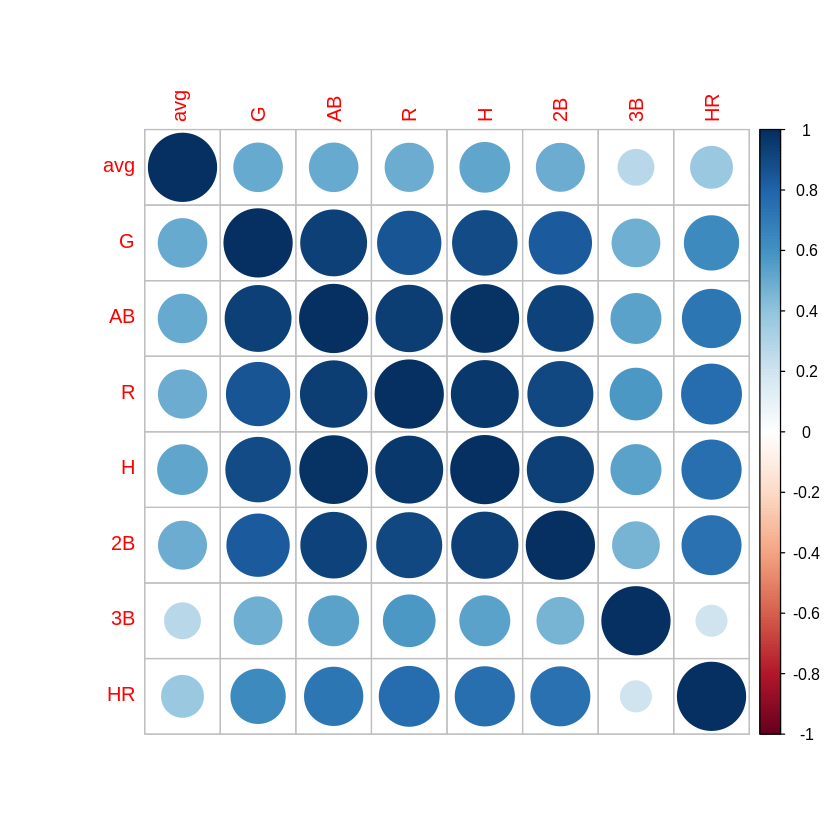

In [ ]:
# method = circle
corrplot(avg_HR_cor_M, method="circle")

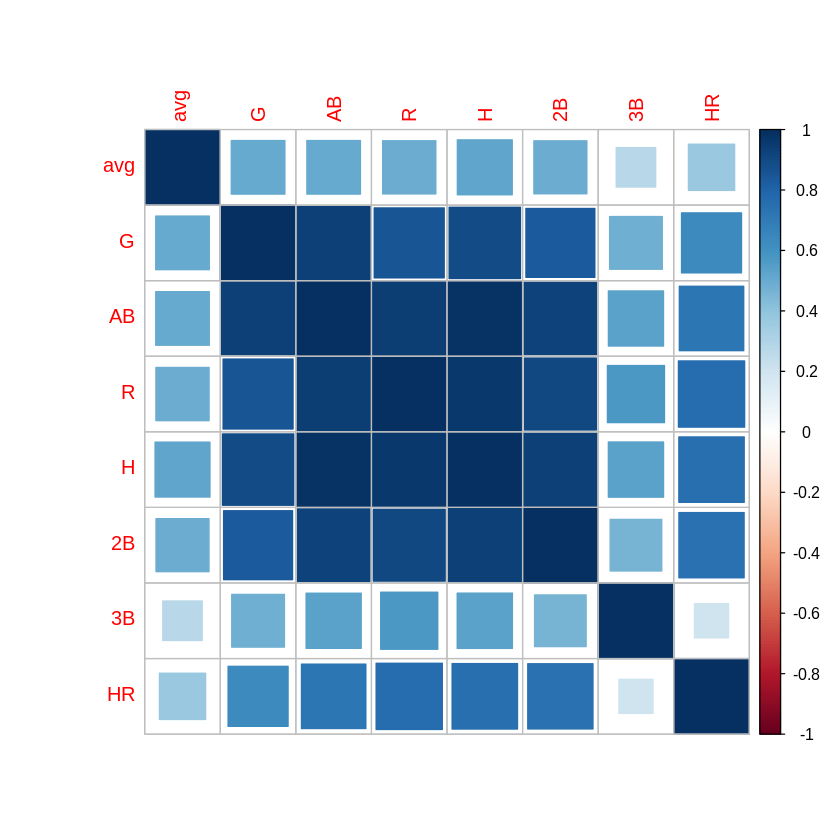

In [ ]:
# method 변경
# method = square
corrplot(avg_HR_cor_M, method="square")

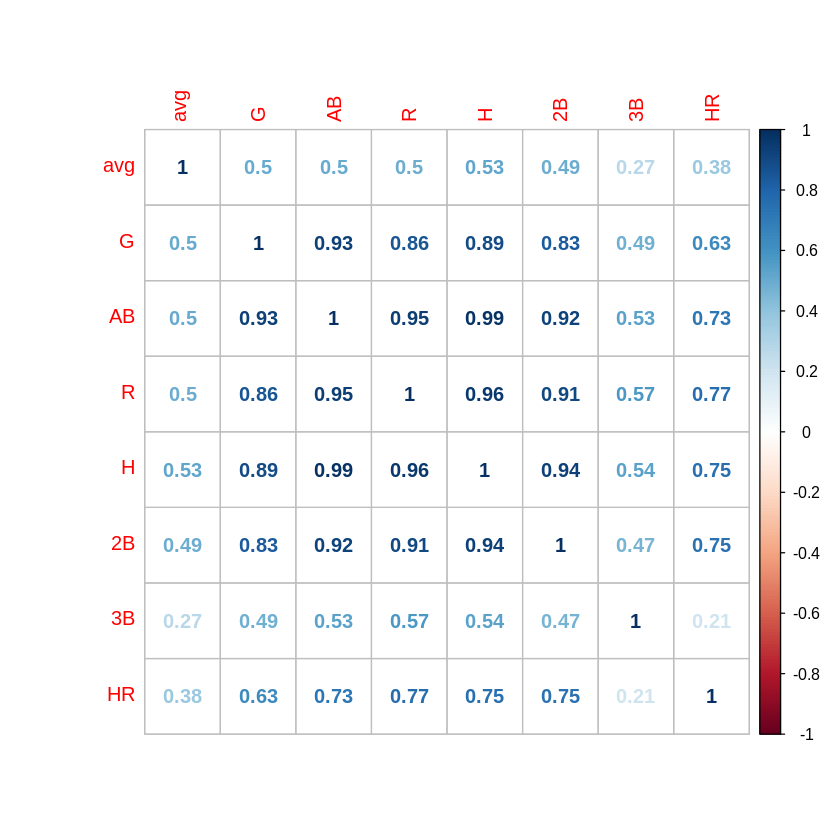

In [ ]:
# method 변경
# method = number
corrplot(avg_HR_cor_M, method="number")

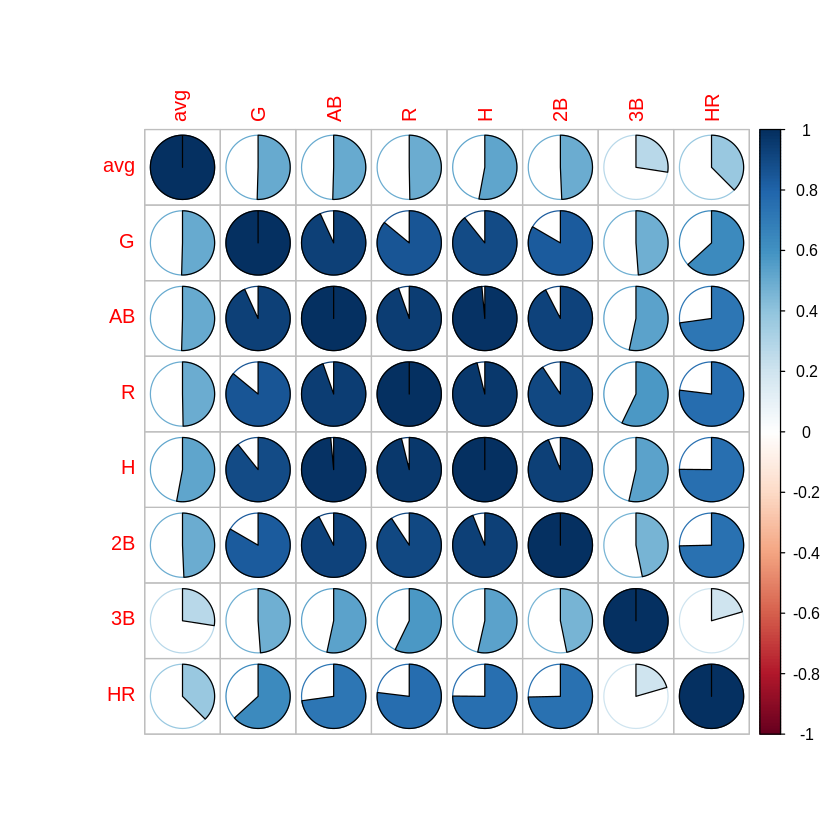

In [ ]:
# method 변경
# method = pie
corrplot(avg_HR_cor_M, method="pie")

* **mixed**

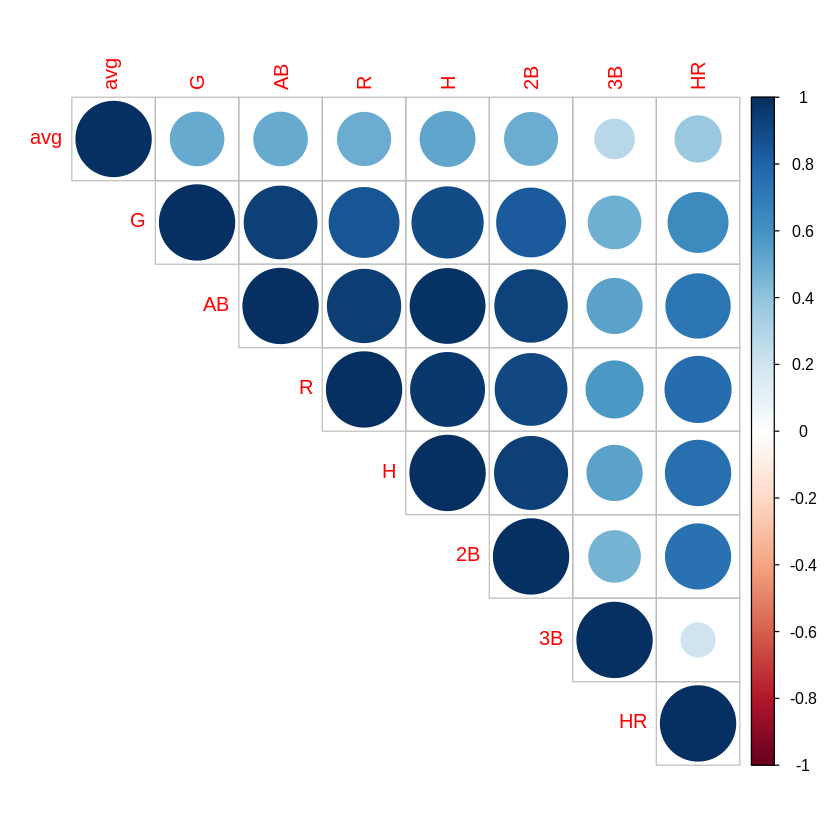

In [ ]:
# type 변경
# type = upper
corrplot(avg_HR_cor_M,type="upper")

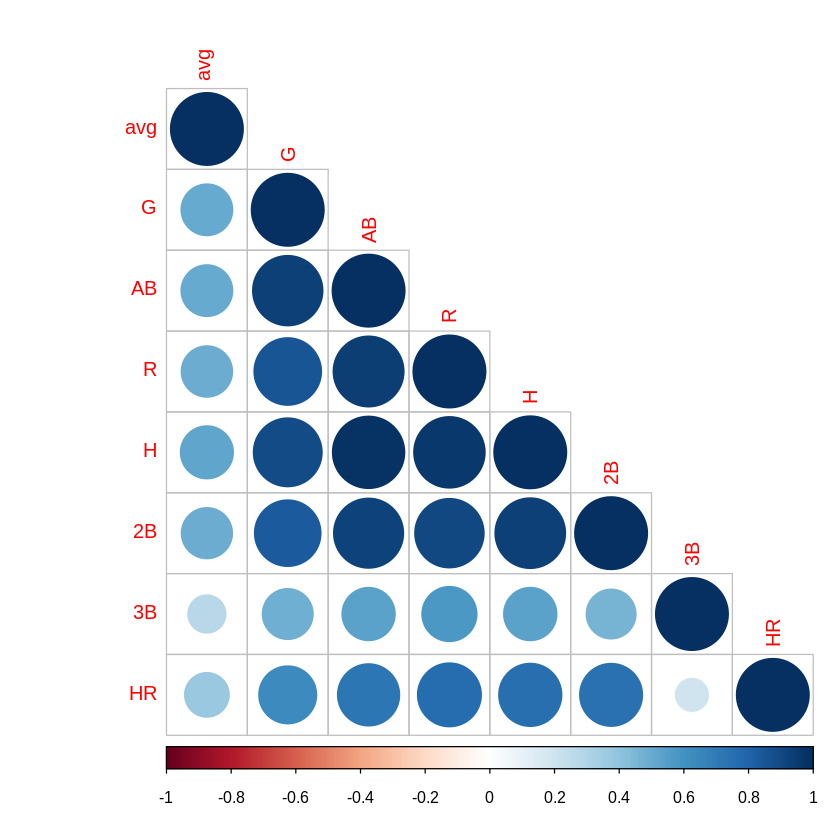

In [ ]:
# type 변경
# type = lower
corrplot(avg_HR_cor_M,type="lower")

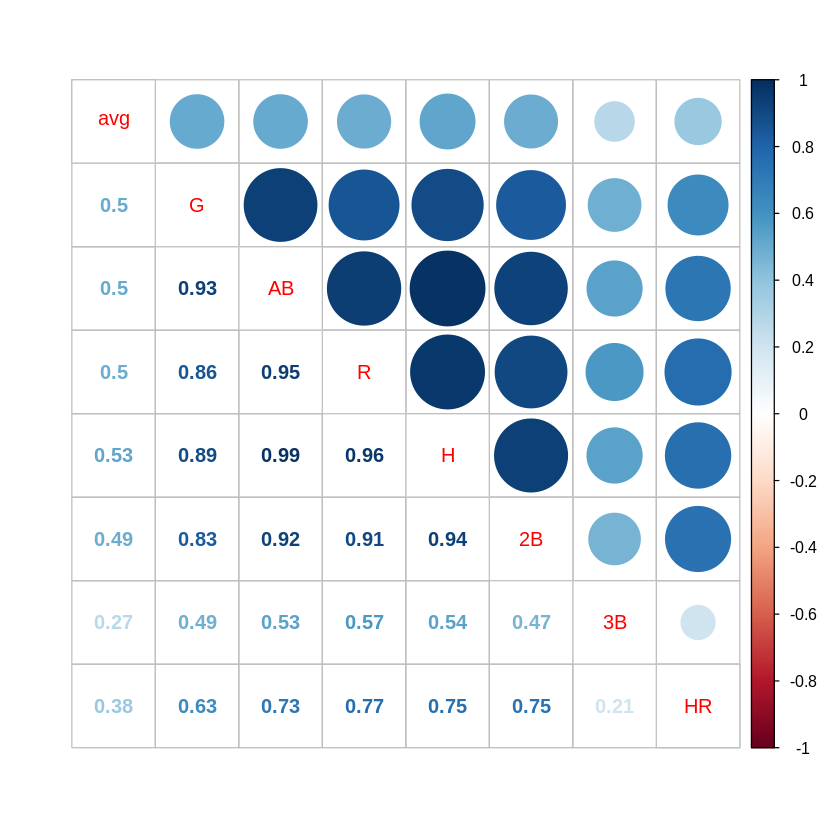

In [ ]:
# corrplot.mixed
corrplot.mixed(avg_HR_cor_M)

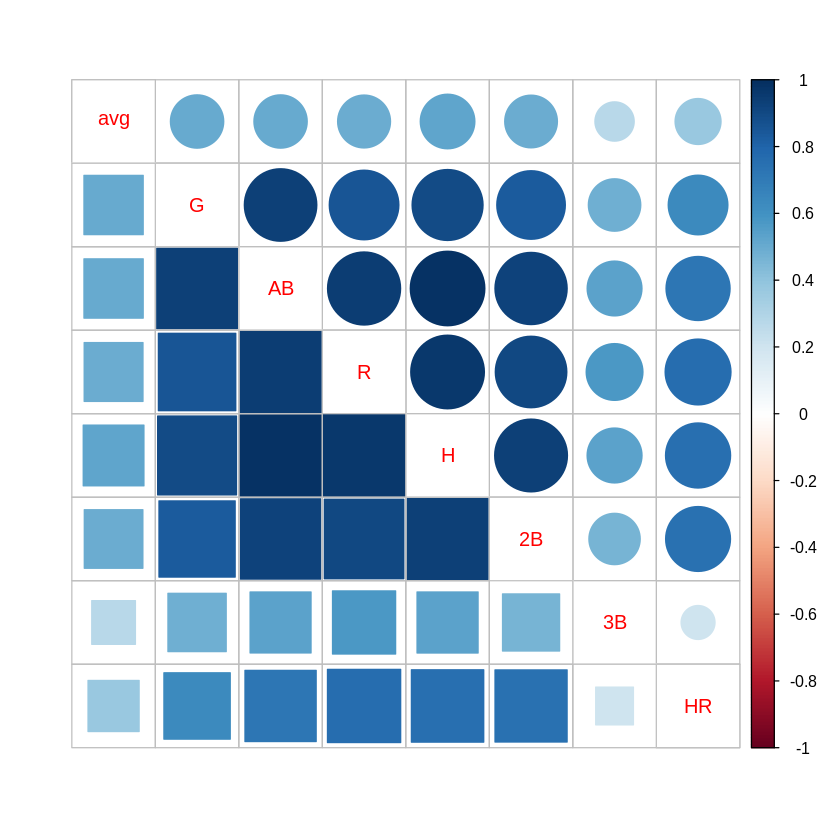

In [ ]:
# corrplot.mixed
corrplot.mixed(avg_HR_cor_M, lower = "square", upper = "circle")

* **군집(clustering)**

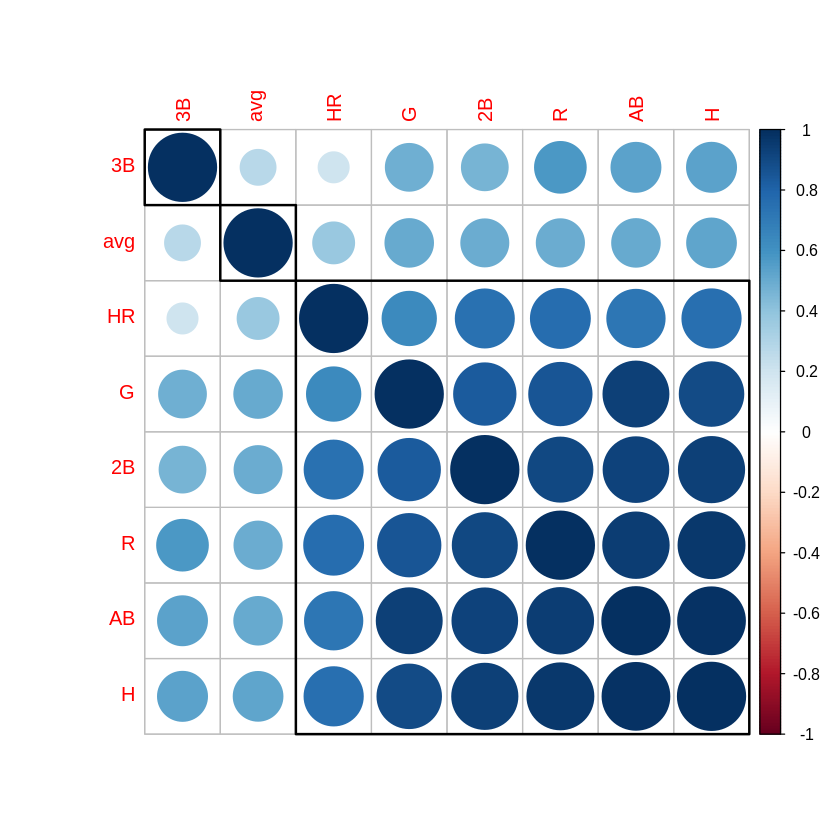

In [ ]:
corrplot(avg_HR_cor_M,order="hclust",addrect=3)

### **(2) plot(base R), ggplot2(tidyverse)**

- - -

####**A. plot(base R)**

**plot()의 주요 옵션**
```
xlab, ylab              x,y축 이름
main                    그래프 제목
pch(plotting character) 점의 종류
cex(character size)     점의 크기
col                     색상
xlim,ylim               x,y축의 값 범위
type                    그래프 유형
```


In [ ]:
# 연도별 팀 평균 타율
team_year_avg <- DF %>%group_by(team, year) %>% summarise(avg_AVG = mean(avg, na.rm = T)) %>%
                      filter(team == "KIA" | team == "SK" | team == "삼성")
team_year_avg %>% show()

# A tibble: 57 x 3
# Groups:   team [3]
   team   year avg_AVG
   <chr> <int>   <dbl>
 1 KIA    2001   0.304
 2 KIA    2002   0.294
 3 KIA    2003   0.218
 4 KIA    2004   0.246
 5 KIA    2005   0.189
 6 KIA    2006   0.269
 7 KIA    2007   0.204
 8 KIA    2008   0.249
 9 KIA    2009   0.257
10 KIA    2010   0.251
# … with 47 more rows


* default

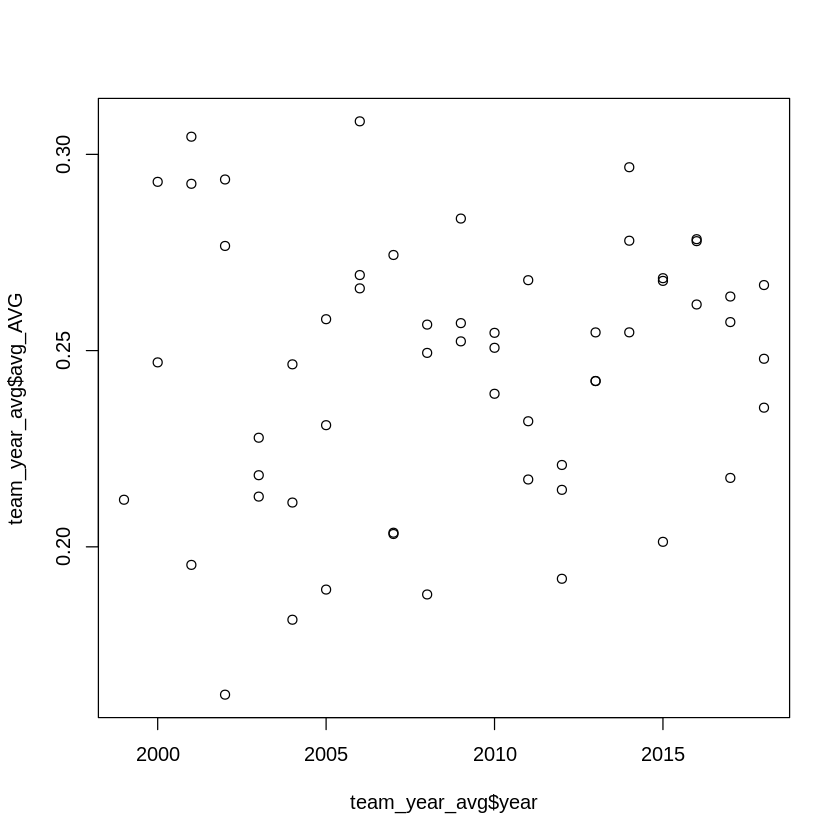

In [ ]:
# 기본 plot
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG)

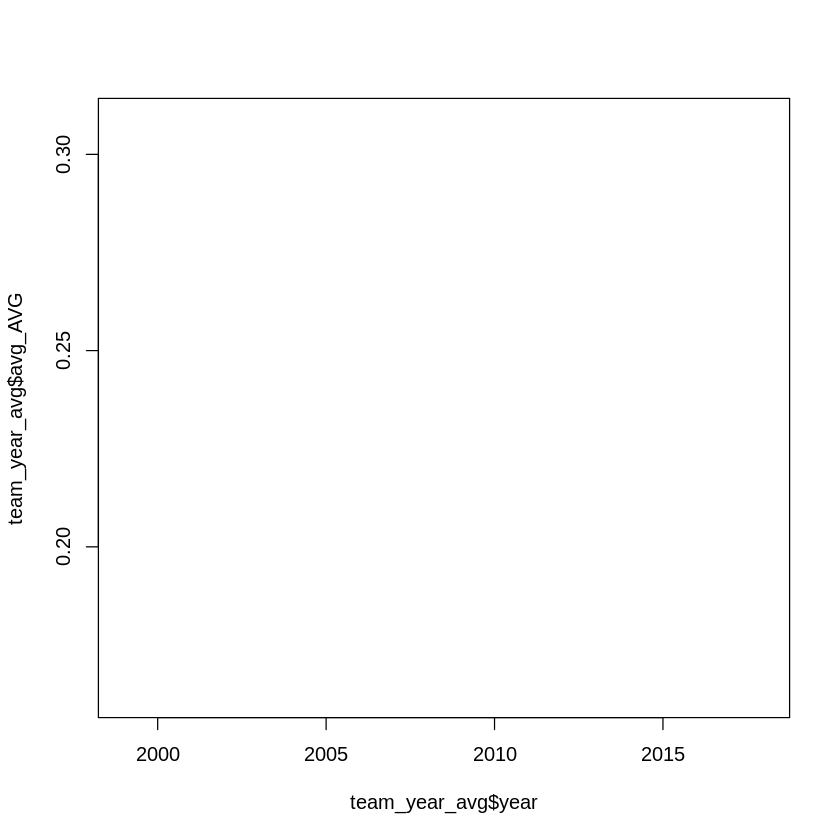

In [ ]:
# type "n"의 상태에서 point함수로 채움
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type ="n")

* point, main, xlab, ylab

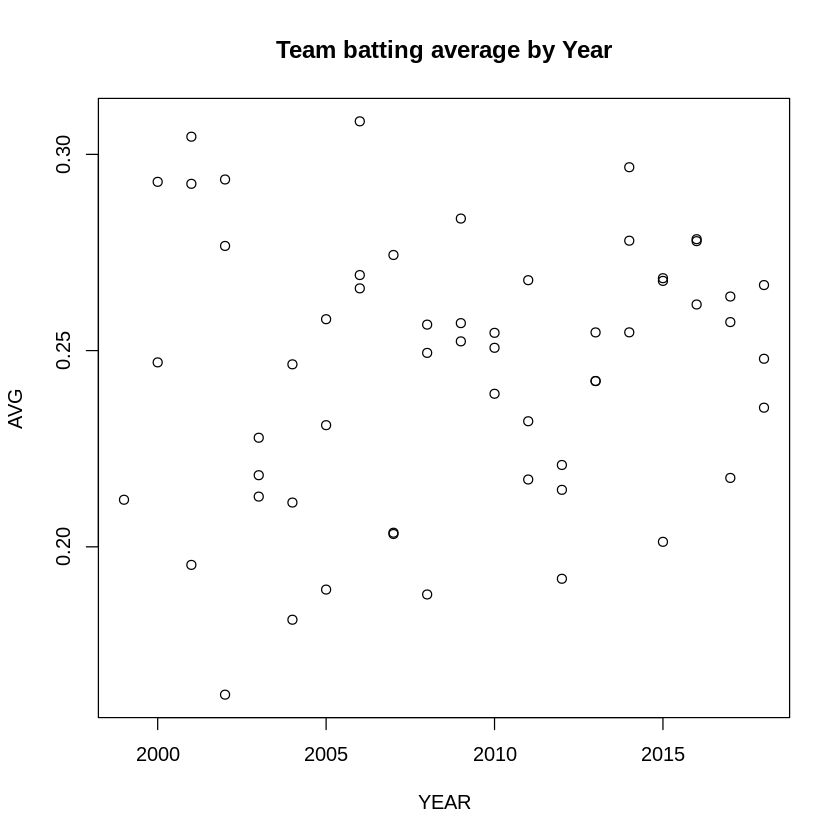

In [ ]:
# main, xlab, ylab
# x 축, y축 이름 변경
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")

# point를 이용한 그래프 추가
samsung <- team_year_avg %>% filter(team == "삼성")
sk <- team_year_avg %>% filter(team == "SK")
kia <- team_year_avg %>% filter(team == "KIA")


points(x = samsung$year, y = samsung$avg_AVG)
points(x = sk$year, y = sk$avg_AVG)
points(x = kia$year, y = kia$avg_AVG)

* col

http://sape.inf.usi.ch/quick-reference/ggplot2/colour

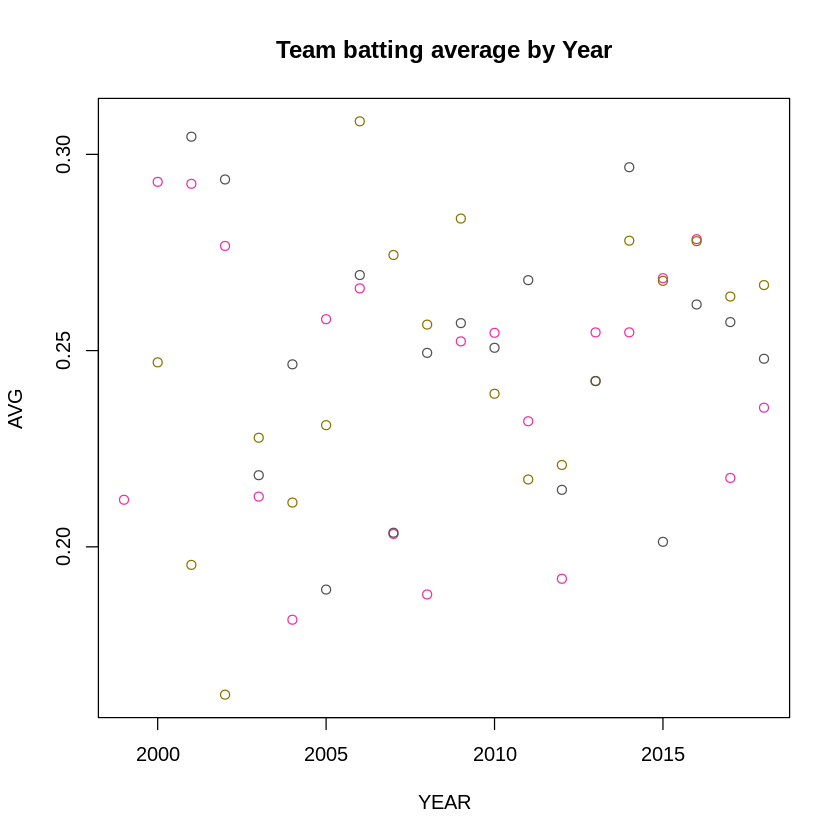

In [ ]:
# col
# team 별 색상 변경
# 단, 그룹화 변수로 주어야함(Factor)
# main, xlab, ylab
# x 축, y축 이름 변경
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year",xlab = "YEAR", ylab = "AVG")

points(x = samsung$year, y = samsung$avg_AVG, col = "maroon2")
points(x = sk$year, y = sk$avg_AVG, col = "gold4")
points(x = kia$year, y = kia$avg_AVG, col = "grey32")

* pch

![대체 텍스트](https://www.statmethods.net/advgraphs/images/points.png)

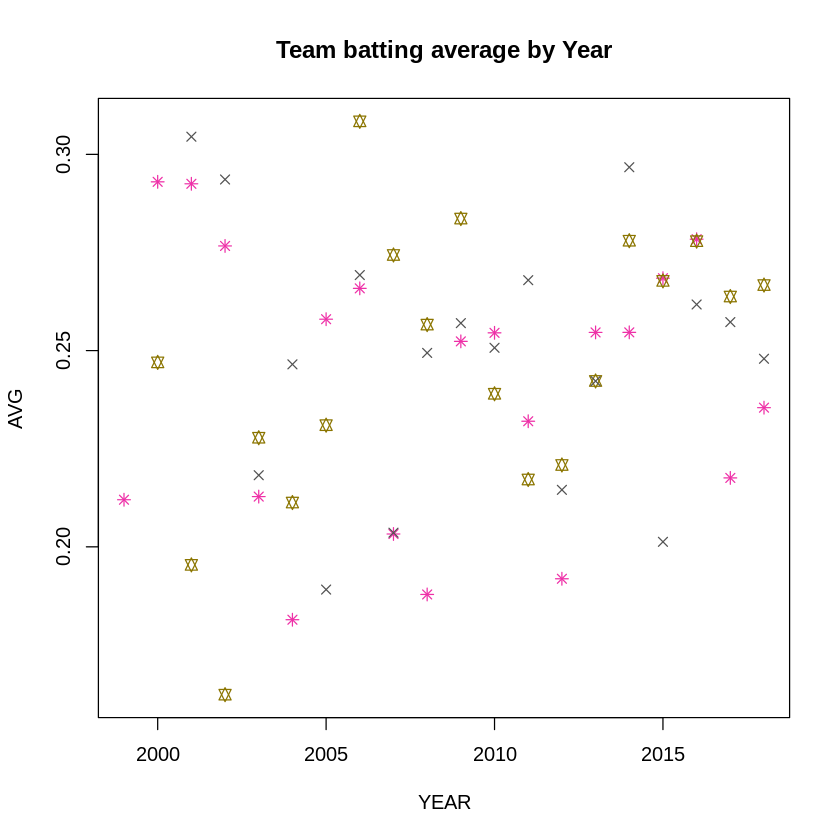

In [ ]:
# pch
# 점의 모양 변경

plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")

points(x = samsung$year, y = samsung$avg_AVG, col = "maroon2", pch = 8)
points(x = sk$year, y = sk$avg_AVG, col = "gold4", pch = 11)
points(x = kia$year, y = kia$avg_AVG, col = "grey32", pch = 4)

* cex

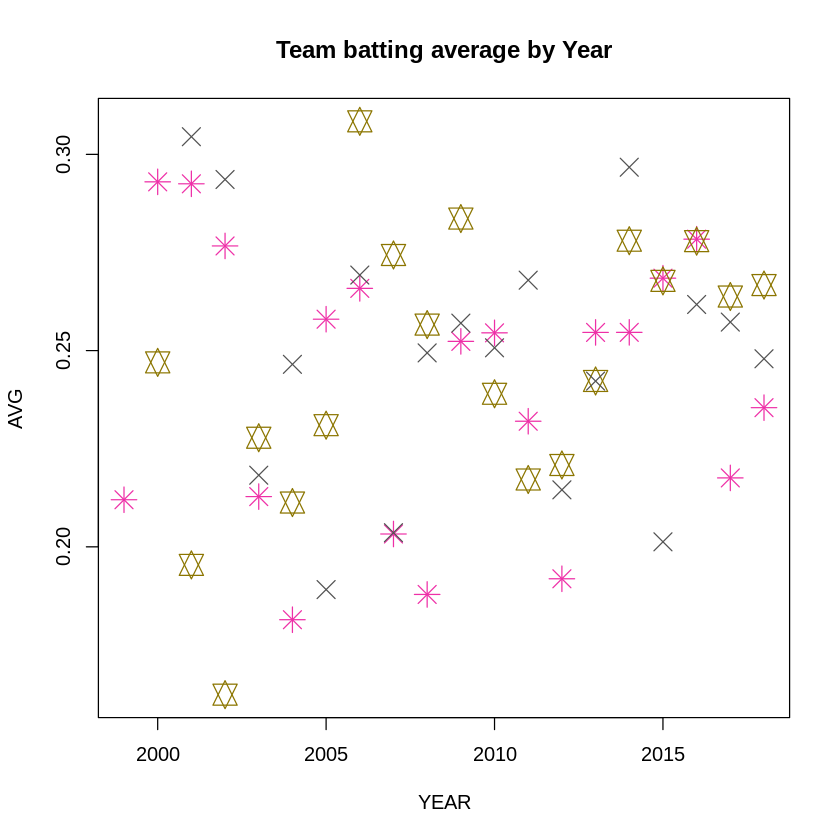

In [ ]:
# cex
# 점의 모양 변경
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")

points(x = samsung$year, y = samsung$avg_AVG, col = "maroon2", pch = 8, cex = 2)
points(x = sk$year, y = sk$avg_AVG, col = "gold4", pch = 11, cex = 2)
points(x = kia$year, y = kia$avg_AVG, col = "grey32", pch = 4, cex = 2)

* legend

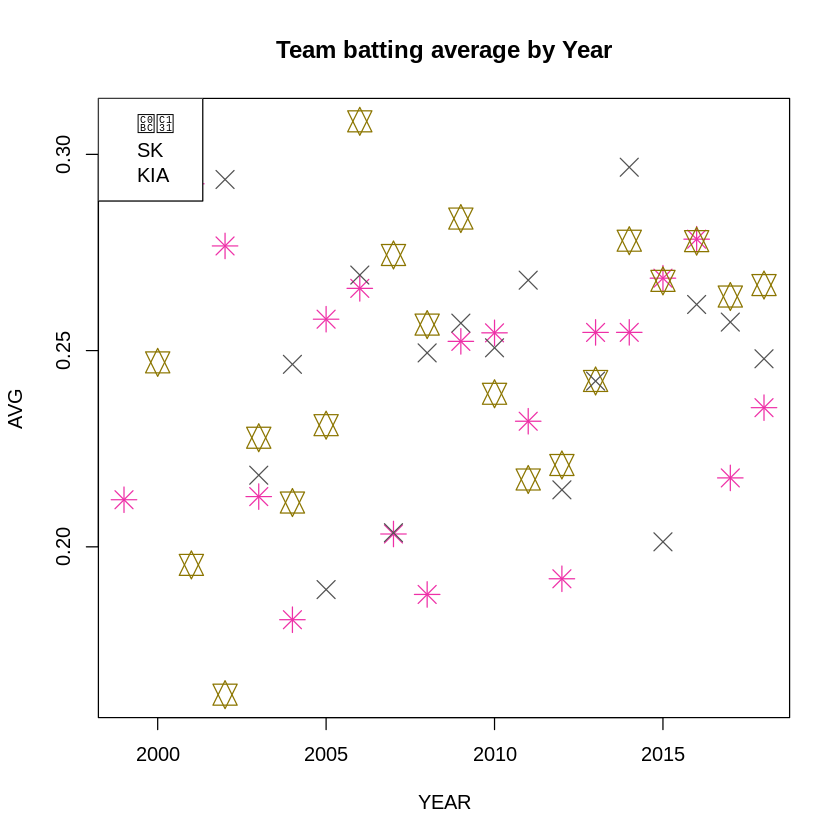

In [ ]:
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")
points(x = samsung$year, y = samsung$avg_AVG, col = "maroon2", pch = 8, cex = 2)
points(x = sk$year, y = sk$avg_AVG, col = "gold4", pch = 11, cex = 2)
points(x = kia$year, y = kia$avg_AVG, col = "grey32", pch = 4, cex = 2)

legend("topleft", legend = c("삼성","SK","KIA"))

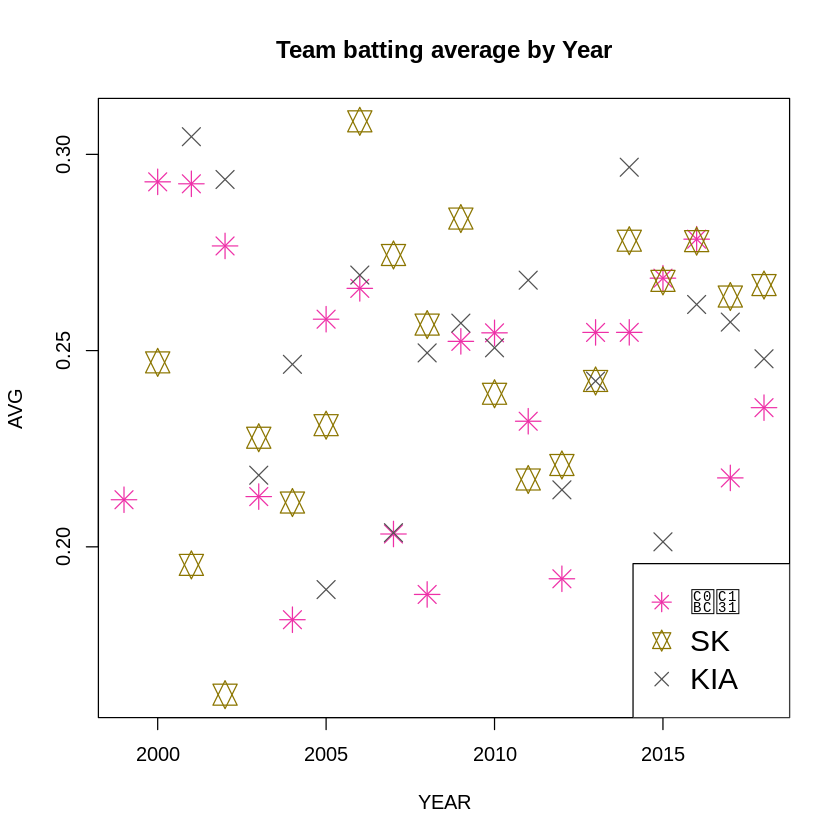

In [ ]:
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")
points(x = samsung$year, y = samsung$avg_AVG, col = "maroon2", pch = 8, cex = 2)
points(x = sk$year, y = sk$avg_AVG, col = "gold4", pch = 11, cex = 2)
points(x = kia$year, y = kia$avg_AVG, col = "grey32", pch = 4, cex = 2)

legend("bottomright", legend = c("삼성","SK","KIA"), pch = c(8,11,4), col = c("maroon2", "gold4", "grey32"), cex = 1.5)

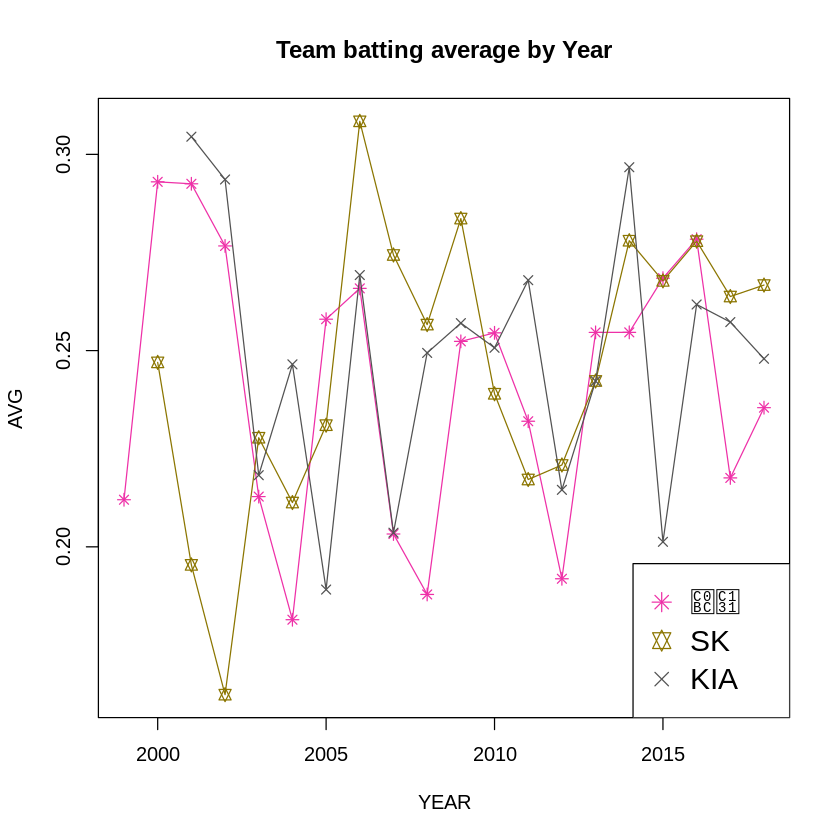

In [ ]:
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")

# 삼성
points(x = samsung$year, y = samsung$avg_AVG, col = "maroon2", pch = 8, cex = 1)
lines(x = samsung$year, y = samsung$avg_AVG, col = "maroon2")

# SK
points(x = sk$year, y = sk$avg_AVG, col = "gold4", pch = 11, cex = 1)
lines(x = sk$year, y = sk$avg_AVG, col = "gold4")

# KIA
points(x = kia$year, y = kia$avg_AVG, col = "grey32", pch = 4, cex = 1)
lines(x = kia$year, y = kia$avg_AVG, col = "grey32")

legend("bottomright", legend = c("삼성","SK","KIA"), pch = c(8,11,4), col = c("maroon2", "gold4", "grey32"), cex = 1.5)

In [ ]:
install.packages("gapminder")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
library(gapminder)
library(RColorBrewer)

In [ ]:
gapminder %>% filter(lifeExp > 70)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Albania,Europe,1982,70.420,2780097,3630.881
Albania,Europe,1987,72.000,3075321,3738.933
Albania,Europe,1992,71.581,3326498,2497.438
Albania,Europe,1997,72.950,3428038,3193.055
Albania,Europe,2002,75.651,3508512,4604.212
Albania,Europe,2007,76.423,3600523,5937.030
Algeria,Africa,2002,70.994,31287142,5288.040
Algeria,Africa,2007,72.301,33333216,6223.367
Argentina,Americas,1987,70.774,31620918,9139.671


In [ ]:
gapminder %>% filter(lifeExp > 70) %>% group_by(year, continent) %>% summarise(n = n_distinct(country)) %>%
 spread(key = continent, value = n) %>% show()

# A tibble: 12 x 6
# Groups:   year [12]
    year Africa Americas  Asia Europe Oceania
   <int>  <int>    <int> <int>  <int>   <int>
 1  1952     NA       NA    NA      5      NA
 2  1957     NA       NA    NA      7       2
 3  1962     NA        2    NA     12       2
 4  1967     NA        3     2     18       2
 5  1972     NA        4     3     21       2
 6  1977     NA        6     5     25       2
 7  1982     NA        9     6     27       2
 8  1987      1       11     8     27       2
 9  1992      2       12    11     27       2
10  1997      4       14    17     28       2
11  2002      5       19    19     30       2
12  2007      7       22    22     30       2


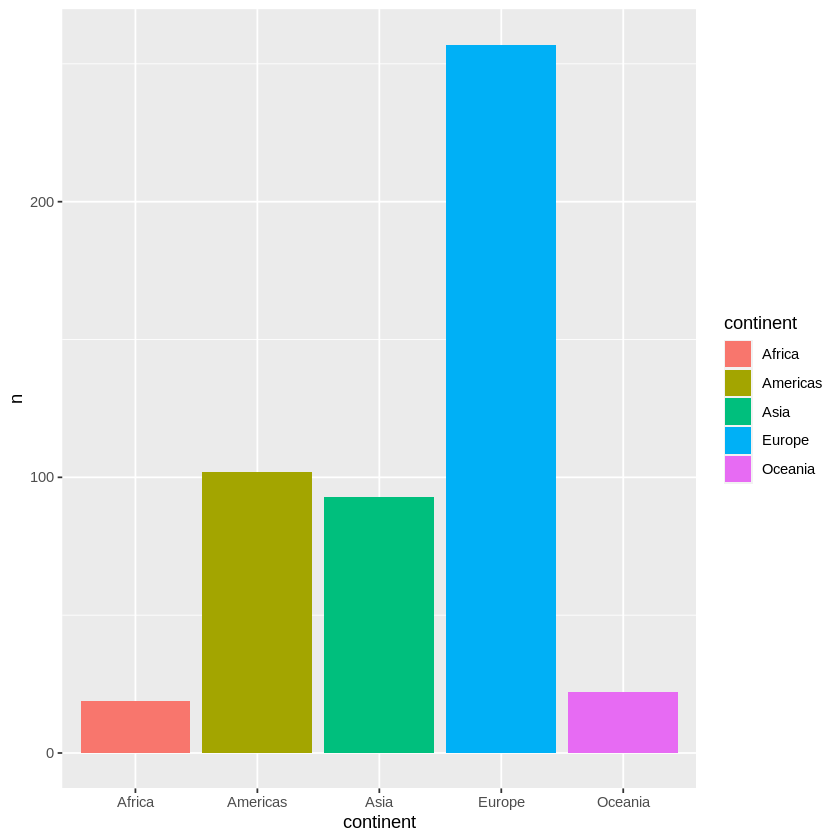

In [ ]:
gapminder %>% filter(lifeExp > 70) %>% group_by(year, continent) %>% summarise(n = n_distinct(country)) %>%
  ggplot(aes(x = continent, y = n)) + geom_bar(stat = "identity", aes(fill = continent))

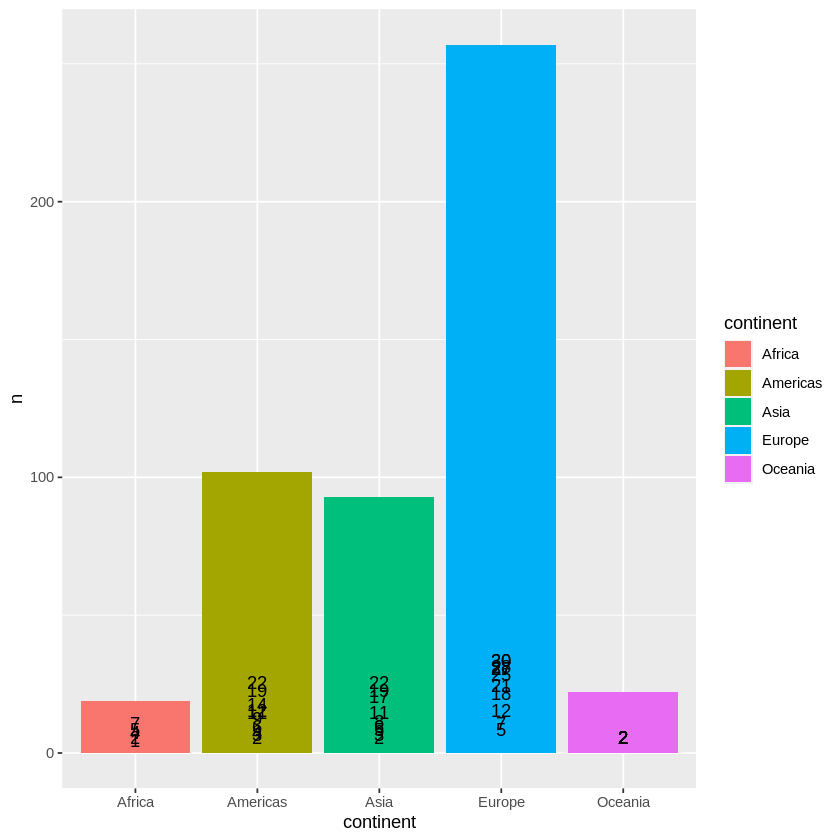

In [ ]:
gapminder %>% filter(lifeExp > 70) %>% group_by(year, continent) %>% summarise(n = n_distinct(country)) %>%
  ggplot(aes(x = continent, y = n)) + geom_bar(stat = "identity", aes(fill = continent)) + scale_y_continuous() + geom_text(aes(label=n), position=position_dodge(width=0.9), vjust=-0.25) + scale_y_continuous